## Question 2

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np

AND = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
OR = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
XOR = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
NAND = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]])

gates = [AND, OR, XOR, NAND]
names = ["AND", "OR", "XOR", "NAND"]
for i in range(len(gates)):
    X, y = pd.DataFrame(gates[i][:, :2]), gates[i][:, 2]
    lr = LogisticRegression(penalty='none')
    lr.fit(X, y)
    svc = SVC(kernel = 'poly')
    svc.fit(X, y)
    print(f'{names[i]} using logistic regression has an accuracy of {lr.score(X, y)}')
    print(f'{names[i]} using SVC with polynomial kernel has an accuracy of {svc.score(X, y)}')
    print(" ")

AND using logistic regression has an accuracy of 1.0
AND using SVC with polynomial kernel has an accuracy of 1.0
 
OR using logistic regression has an accuracy of 1.0
OR using SVC with polynomial kernel has an accuracy of 1.0
 
XOR using logistic regression has an accuracy of 0.5
XOR using SVC with polynomial kernel has an accuracy of 1.0
 
NAND using logistic regression has an accuracy of 1.0
NAND using SVC with polynomial kernel has an accuracy of 1.0
 


For AND, OR, and NAND gates, the data points are linearly separable which allows logistic regression, a linear classifier, to learn these logical gates. I used a polynomial kernel for SVC, which is also able to learn these linearly separable gates. However, logistic regression is not able to learn the XOR gate because it is not linearly separable, but SVC with polynomial kernel can because we're employing the kernel trick, which makes the problem a linear classification problem.

## Question 3

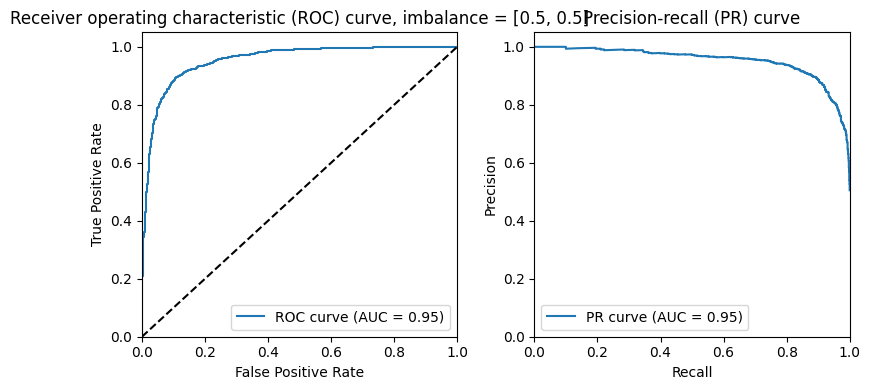

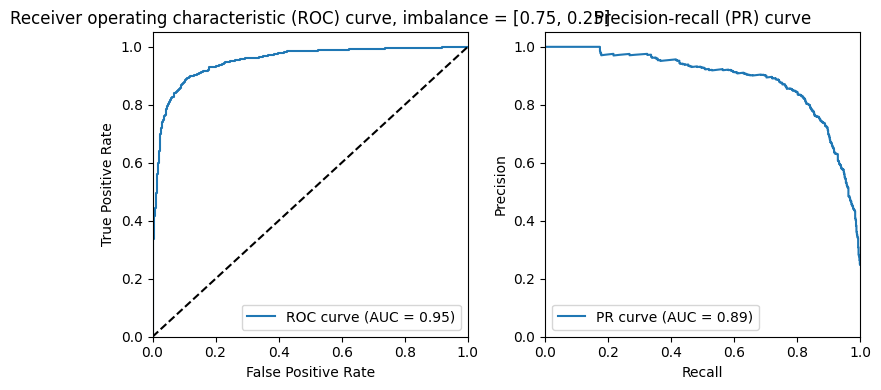

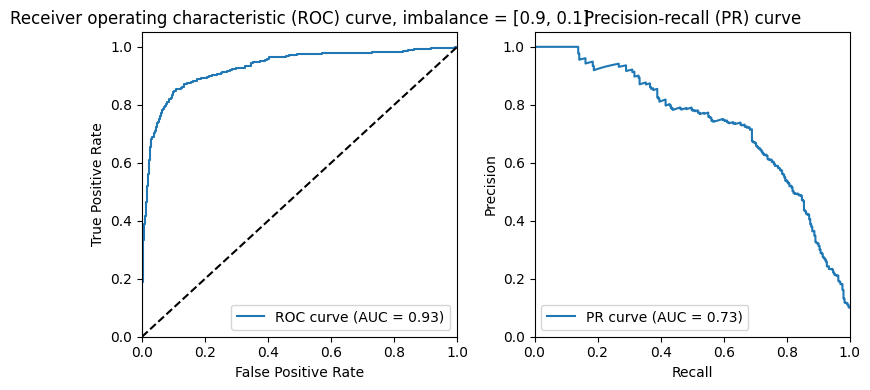

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate random data with different levels of class imbalance
weights = [[0.5, 0.5], [0.75,0.25], [0.9, 0.1]]
for w in weights:
    X, y = make_classification(n_samples=10000, n_features=10, weights=w,
                                n_classes=2, random_state=42)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities on test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Compute precision-recall curve and AUC
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Plot ROC curve and PR curve
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic (ROC) curve, imbalance = {w}')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-recall (PR) curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


As seen above, as the class imbalance increases (there are more and more negative samples), the AUC ROC seems to be fairly constant, while the AUC under the precision-recall curve decreases sharply. This is reasonable because the more samples you predict as positive, the higher the true positive rate will be and thus the lower the false negative rate will be, causing a higher recall, but it will also increase false positve rate, causing a decrease in precision. It is important to look at both curves when evaluating the performance of a classifier. 

Moreover, as we increase the number of negative samples, the true negative rate will naturally increase. Thus, the AUC ROC will become less reliable as we are only looking at positive cases. On the other hand, the PR curve incorporates the vast number of negatives into its calculation of performance, which gives us a much better view of how well the model is identifying the positive cases.

## Question 4

I first determined which properties to feed in. Since we are trying to learn a radial decision boundary, having only linear features may not be desirable. Thus, I chose X1, X2, X1X2, X12, X22 as the features. I left out sin(X1) and sin(X2) as, I discovered in my trials, they caused the neural network to be inaccurate and unstable. Furthermore, I tried different activation functions and eventually settled on ReLu. This is because during training using tanh,, I noticed huge instabilities in the training and test errors, which means a potential vanishing / exploding gradient problem. ReLU is good at solving this. I also noticed testing error to increase as training time increased, so I added a regularization term.

For the network architecture, I started out with a large neural network (6 layers and 8 neurons each). I then decreased the size of the neural network to achieve the best size as seen below.

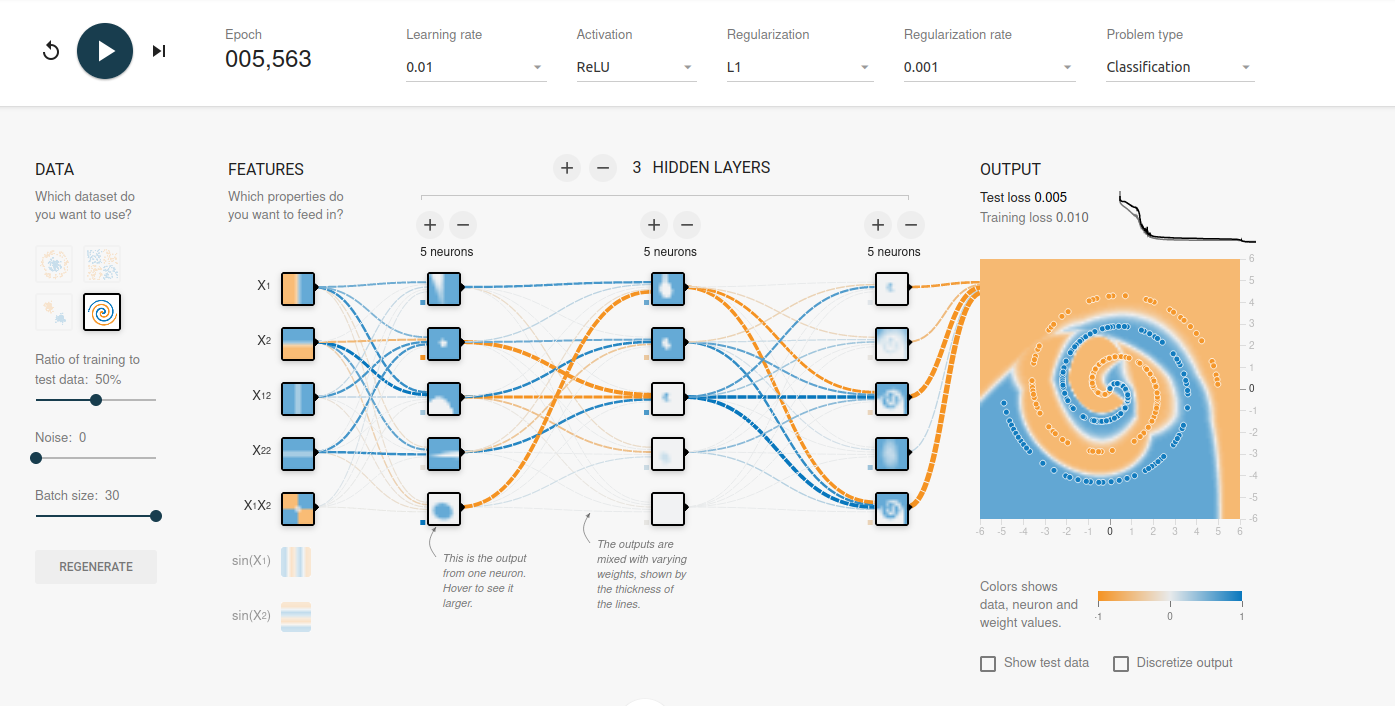

In [40]:
from PIL import Image
Image.open('pic.png')